In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

(regression-with-deep-neural-networks)=
# Regression with Deep Neural Networks

## Objectives

+ Understand the basics of `PyTorch`.
+ Set up and train regression DNNs with `PyTorch`

## References 

+ Reading Activity 24
+ Chapters 6, 7, and 8 of https://www.deeplearningbook.org/
+ [Deep Learning with PyTorch: A 60 minute blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) and in particular:
    - [What is PyTorch?](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
    - [Autograd: Automatic differentation](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)
    - [Neural networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py)

## What is PyTorch and why are we using it?

+ PyTorch is an alternative to Numpy that can harness the power of [GPUs](https://en.wikipedia.org/wiki/Graphics_processing_unit).
+ PyTorch provides some core functionality for Neural Networks:
    - Some basic elements for building them up like linear layers, activation functions, etc.
    - Automatic differentation for getting the derivative of loss functions with respect to parameters.
    - Some stochastic optimization algorithms for minimizing loss functions
    - ...

I am not going to provide here a complete tutorial of PyTorch.
You are advised to go over the first three topics of the [Deep Learning with PyTorch: A 60 minute blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) prior to beginning this hands-on activity.
Otherwise, it is unlikely that you understand the code that follows.

PyTorch was developed by the Facebook AI Research Group.
There is another powerful alternative developed by Google Brain: [TensorFlow](https://www.tensorflow.org/).
I find PyTorch easier to use than TensorFlow and that's why we only use this in this class.

## Making neural networks in PyTorch

PyTorch is fairly flexible in allowing you to make any type neural network you like.
You have absolute freedom on how your model looks like.
However, it does provide a super easy way to make dense neural networks with a fixed activation function.
That's what we are going to start with.
First, import torch:

In [2]:
import torch

The submodule `torch.nn` is where the neural network building blocks reside:

In [3]:
import torch.nn as nn

First, let me show you how you can make a single linear layer:
$$
y = Wx + b.
$$
The weights are selected randomly if not specified.
Here you go:

In [4]:
layer = nn.Linear(1, 20)

This is now a function that takes one dimensional inputs and spits out 20 dimensional outputs.
Here is how it works:

In [5]:
x = torch.rand(10, 1) # 10 randomly sampled one dimensinal inputs
print(x)

tensor([[0.3243],
        [0.7808],
        [0.2846],
        [0.2802],
        [0.5175],
        [0.1368],
        [0.8318],
        [0.8738],
        [0.1703],
        [0.8635]])


In [6]:
y = layer(x)
print(y)

tensor([[ 0.9553, -0.0708,  0.0977,  0.1812, -0.8013, -0.7836, -0.5528,  0.6642,
          0.1388,  1.2068, -0.1274, -0.1646, -0.8330, -0.7469, -0.4537, -0.9398,
          0.1926,  0.9901,  0.3872,  1.0143],
        [ 1.1075, -0.2200,  0.4106,  0.6055, -1.1514, -0.6292, -0.8909,  0.6650,
          0.3702,  1.5170, -0.4881, -0.2010, -1.2772, -0.8869, -0.4392, -1.1719,
          0.5615,  1.0600,  0.6605,  1.3452],
        [ 0.9420, -0.0578,  0.0705,  0.1442, -0.7708, -0.7970, -0.5233,  0.6641,
          0.1187,  1.1798, -0.0960, -0.1615, -0.7943, -0.7347, -0.4550, -0.9196,
          0.1605,  0.9840,  0.3634,  0.9855],
        [ 0.9405, -0.0564,  0.0674,  0.1401, -0.7674, -0.7985, -0.5201,  0.6641,
          0.1164,  1.1768, -0.0925, -0.1611, -0.7900, -0.7333, -0.4551, -0.9174,
          0.1569,  0.9833,  0.3608,  0.9823],
        [ 1.0197, -0.1340,  0.2301,  0.3607, -0.9494, -0.7183, -0.6959,  0.6645,
          0.2367,  1.3381, -0.2801, -0.1800, -1.0209, -0.8061, -0.4476, -1.0380,
      

In [7]:
print(y.shape)

torch.Size([10, 20])


So, this took us to 10, 20 dimensional outputs. Looks good.

But where are the weights and the bias term?
Here they are:

In [8]:
layer.weight

Parameter containing:
tensor([[ 0.3335],
        [-0.3268],
        [ 0.6854],
        [ 0.9296],
        [-0.7669],
        [ 0.3381],
        [-0.7406],
        [ 0.0017],
        [ 0.5069],
        [ 0.6794],
        [-0.7903],
        [-0.0796],
        [-0.9730],
        [-0.3067],
        [ 0.0318],
        [-0.5085],
        [ 0.8080],
        [ 0.1532],
        [ 0.5987],
        [ 0.7248]], requires_grad=True)

In [9]:
layer.bias

Parameter containing:
tensor([ 0.8471,  0.0352, -0.1246, -0.1203, -0.5526, -0.8932, -0.3126,  0.6636,
        -0.0256,  0.9865,  0.1289, -0.1388, -0.5174, -0.6474, -0.4640, -0.7749,
        -0.0695,  0.9404,  0.1930,  0.7792], requires_grad=True)

You can directly change them if you wish.
Notice the `requires_grad=True` flag.
This is because PyTorch knows that these are parameters to be optimized.

There is a little bit of flexibility on `nn.Linear`.
For example, you can completly drop the bias if you wish.
For the complete list of possibilities, you should always [check the docs](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

Now, let's get to the activation functions.
There are a lot already in `torch.nn`.
Here is the sigmoid:

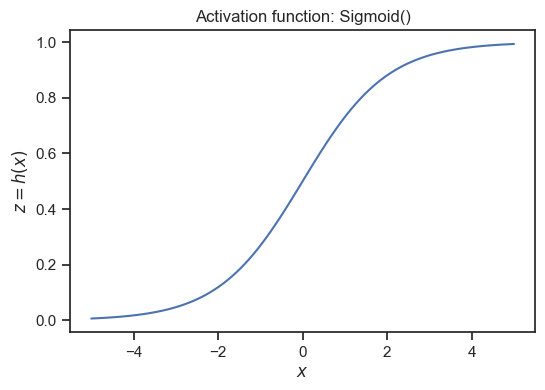

In [10]:
h = nn.Sigmoid()

fig, ax = plt.subplots()
x = torch.linspace(-5, 5, 100)[:, None]
ax.plot(x, h(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$z=h(x)$')
ax.set_title('Activation function: ' + str(h));

Now, you could also implement the activation fuction by hand.
The only restriction is that you should be using `PyTorch` functions instead of `numpy` functions.
Here is how we would do it for the sigmoid:

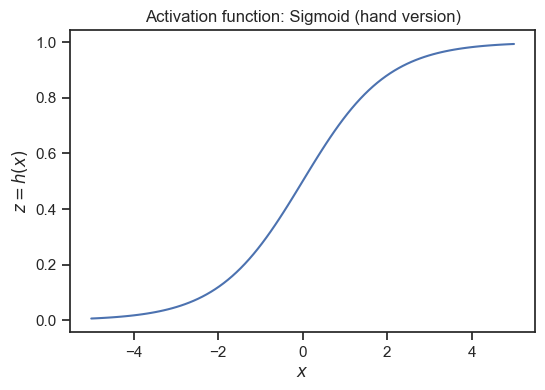

In [11]:
# Here is how you could do this by hand:
h_by_hand = lambda x: torch.exp(x) / (1.0 + torch.exp(x))

fig, ax = plt.subplots(dpi=100)
ax.plot(x, h_by_hand(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$z=h(x)$')
ax.set_title('Activation function: Sigmoid (hand version)');

Here are now some of the most commonly used activation functions in `torch.nn`:

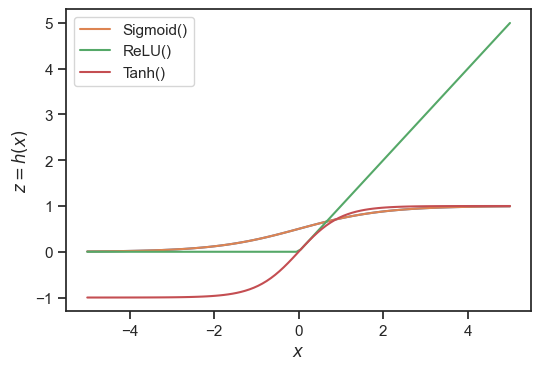

In [12]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x, h_by_hand(x))

for Func in [nn.Sigmoid, nn.ReLU, nn.Tanh]:
    h = Func()
    ax.plot(x, h(x), label=str(h))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$z=h(x)$')
plt.legend(loc='best');

Now that we have a linear layer and an activation function here is how we can combine them to make a function that takes us from the input to the internal neurons:

In [13]:
h = nn.Sigmoid()
z_func = lambda x: h(layer(x))

This is pretty much it. And that's now a function:

In [14]:
z_func(x)

tensor([[0.3057, 0.8415, 0.0279,  ..., 0.5435, 0.0573, 0.0549],
        [0.3129, 0.8370, 0.0298,  ..., 0.5473, 0.0607, 0.0589],
        [0.3202, 0.8325, 0.0319,  ..., 0.5512, 0.0642, 0.0631],
        ...,
        [0.9204, 0.1776, 0.9595,  ..., 0.8423, 0.9555, 0.9860],
        [0.9228, 0.1728, 0.9621,  ..., 0.8443, 0.9580, 0.9870],
        [0.9252, 0.1681, 0.9645,  ..., 0.8464, 0.9603, 0.9879]],
       grad_fn=<SigmoidBackward0>)

Now, for regression, we would like to bring this back to a scalar output.
To do this, we need to add one more linear layer taking the 20 internal neurons, back to one dimension.


In [15]:
final_layer = nn.Linear(20, 1)
f = lambda x: final_layer(z_func(x))
print(f(x).shape)

torch.Size([100, 1])


Instead of doing this manually, we can can use the class `nn.Sequential` of PyTorch:

In [16]:
f = nn.Sequential(layer, nn.Sigmoid(), final_layer)

This is the recommended way, because `nn.Sequential` adds some additional functionality which I will show you in a while.
You can evaluate this as a function, and you can also plot it.
But to plot it, you have to turn the output into a proper numpy array.
This is because matplotlib doesn't like PyTorch tensors that depend on parameters.
Here is what you need to do:

In [17]:
y = f(x).detach().numpy() # detach freezes the parameters to whatever they are
                          # numpy returns a proper numpy array
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(100, 1)


And here is how it looks like (remember the weights are random):

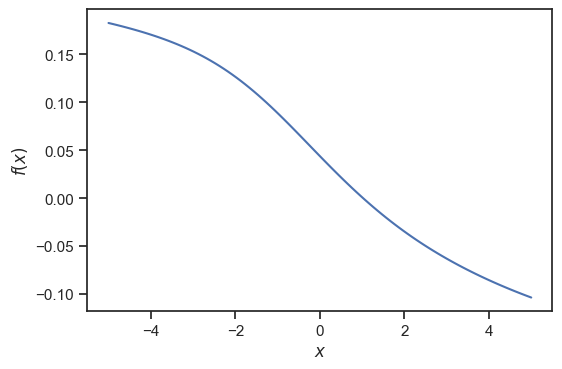

In [18]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x, f(x).detach().numpy())
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$');

The class `nn.Sequential` is very convenient, because it allows us to build very deep networks really quickly.
Here is a 5-layer network that starts from one input, takes us through 3 layers with 20 neurons each, and ends on a single output:

In [19]:
f = nn.Sequential(nn.Linear(1, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 1))

Where are the parameters in an object created in this way?
Here they are:

In [20]:
for theta in f.named_parameters():
    print(theta)

('0.weight', Parameter containing:
tensor([[-0.9494],
        [-0.5797],
        [ 0.7302],
        [-0.0819],
        [ 0.5270],
        [ 0.3091],
        [-0.6618],
        [ 0.6813],
        [ 0.9285],
        [-0.6157],
        [ 0.3522],
        [ 0.7152],
        [ 0.3459],
        [ 0.9119],
        [ 0.9230],
        [-0.8903],
        [-0.5736],
        [-0.1883],
        [ 0.8873],
        [ 0.1048]], requires_grad=True))
('0.bias', Parameter containing:
tensor([ 0.9366,  0.2265,  0.0545, -0.2765,  0.6935, -0.9344,  0.1544, -0.3876,
        -0.9403,  0.5065, -0.4656,  0.4354,  0.1429, -0.0789, -0.4995,  0.0885,
         0.3439,  0.7998, -0.4361, -0.0108], requires_grad=True))
('2.weight', Parameter containing:
tensor([[ 1.1286e-01,  2.1704e-01,  4.2998e-02, -1.6689e-01, -1.0710e-01,
          1.3086e-01, -4.3783e-02,  1.7829e-02, -2.1267e-01,  1.7514e-01,
         -5.2786e-02, -1.8603e-01,  1.5589e-01, -5.7996e-02,  1.7400e-02,
         -1.4377e-01, -1.3804e-01, -5.2051e-02,

And that's why we love PyTorch. Because it does all the dirty work for us.
Imagine having to keep track of all these parameters by hand.

For those of you who want to know what is going on inside `nn.Linear`, just note that it is a special case of a PyTorch neural network module, see [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
The latter is what you would directly inherit when writing your own class for a non-standard neural network.
We are not going to cover it in this class, but you can find plenty of examples [here](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html).

## Making a loss function

Let's now make the loss function that we want to minimize.
It needs to be a `PyTorch` function as well.
For regression problems, we can think of the loss as a function of the model predictions and the observed data.
That is the depends on the parameters comes through the predictions.
Let's write down the mean square error (MSE) loss in this form.
It is:

$$
L_{\text{MSE}}(\theta) = L_{\text{MSE}}(y_{1:n}, f(x_{1:n};\theta)) = \frac{1}{n}\sum_{i=1}^n\left[y_i-f(x_i;\theta)\right]^2,
$$

where $x_{1:n}$ are the observed inputs (features), $y_{1:n}$ are the observed outputs (targets), and $f(x_{1:n};\theta)$ contains the model predictions on the observed inputs.

You can implement the MSE loss like this:

In [21]:
mse_loss_ours = lambda y, f: torch.mean((y - f) ** 2)

Or we can use built-in PyTorch functionality:

In [22]:
mse_loss = nn.MSELoss()

Let's evaluate it for some random data:

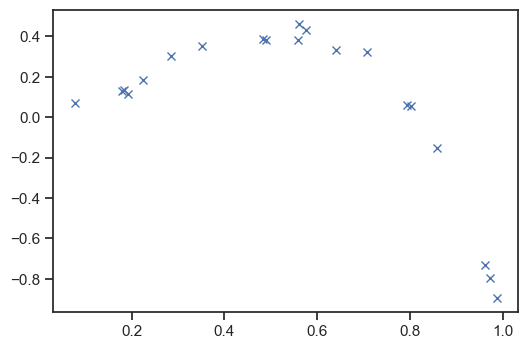

In [23]:
# The number of fake observations
n = 20
# Some fake observed features
x_fake = torch.rand(n, 1)
# Some fake observed targets
y_fake = 4 * x_fake ** 2 - 5 * x_fake ** 3 + 0.1 * torch.rand(n, 1)
fig, ax = plt.subplots(dpi=100)
ax.plot(x_fake, y_fake, 'x');

And here is how to calculate the loss (for the random parameters that our net started with):

In [24]:
# Predict with the net:
y_pred = f(x_fake)
# Evaluate the loss
our_loss = mse_loss_ours(y_fake, y_pred)
built_in_loss = mse_loss(y_fake, y_pred)
print(our_loss)
print(built_in_loss)

tensor(0.2232, grad_fn=<MeanBackward0>)
tensor(0.2232, grad_fn=<MseLossBackward0>)


Now, let's just minimize the MSE loss for these fake data and see what kind of fit we are going to get.
Here is how you do this in PyTorch.
Since I don't have a lot of data, I will just use gradient descent - no randomly subsampling the data.
I will show you how you can use stochastic gradient descent in the next example.

In [25]:
# Reinitialize the net:
f = nn.Sequential(nn.Linear(1, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 1))

# Initialize the optimizer - Notice that it needs to know about the 
# parameters it is optimizing
optimizer = torch.optim.SGD(f.parameters(), lr=0.01) # lr is the learning rate
# Some place to hold the training loss for visualizing it later
training_loss = []
# Iterate the optimizer. Let's just do 10 iterations.
for i in range(10000):
    # This is essential for the optimizer to keep
    # track of the gradients correctly
    # It is using some buffers internally that need to
    # be manually zeroed on each iteration.
    # This is because it doesn't know when you are done with the
    # calculation of the loss
    optimizer.zero_grad()
    # Make predictions
    y_pred = f(x_fake)
    # Evaluate the loss - That's what you are minimizing
    loss = mse_loss(y_fake, y_pred)
    # Evaluate the derivative of the loss with respect to
    # all parameters - It knows how to do it because of
    # PyTorch magick
    loss.backward()
    # And now you are ready to make a step
    optimizer.step()
    # Save the training loss of later visualization
    training_loss.append(loss.item())
    # Print the loss every one hundend iterations:
    if i % 1000 == 0:
        print('it = {0:d}: loss = {1:1.3f}'.format(i, loss.item()))

it = 0: loss = 0.183
it = 1000: loss = 0.157
it = 2000: loss = 0.111
it = 3000: loss = 0.033
it = 4000: loss = 0.009
it = 5000: loss = 0.002
it = 6000: loss = 0.001
it = 7000: loss = 0.001
it = 8000: loss = 0.001
it = 9000: loss = 0.001


Let's plot the predictions of this model on the fake data:

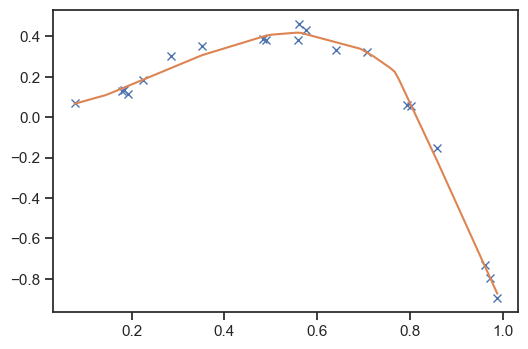

In [26]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x_fake, y_fake, 'x');
xx = torch.linspace(x_fake.min(), x_fake.max(), 100)[:, None]
yy = f(xx).detach().numpy()
ax.plot(xx, yy);

Now, this may or may not work depending on what random seed you start with.
If you run it a few times it may get stack at some local minimum.
Unless we do stochastic optimization, i.e., subsampling the data, this is not a very good algorithm.
Here how the loss changes with each iteration:

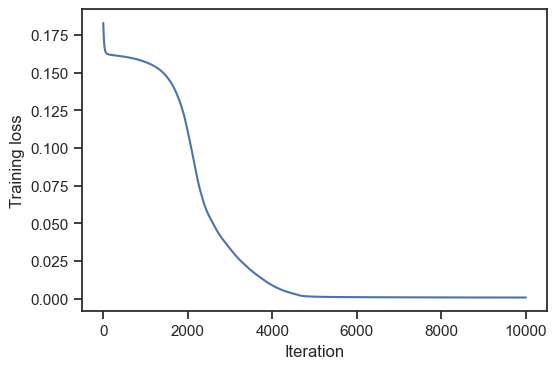

In [27]:
fig, ax = plt.subplots(dpi=100)
ax.plot(training_loss)
ax.set_xlabel('Iteration')
ax.set_ylabel('Training loss');

The problem is the plato we have at the beginning of the optimization.

Let's redo this thing with stochastic optimization.
For stochastic optimization we need to subsample the data during each iteration.
We can either do this manually or using PyTorch functionality.
First, let's do it manually.

In [28]:
# Pick a subsampling batch size
m = 5

# Reinitialize the net:
f = nn.Sequential(nn.Linear(1, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 1))

# Reinitialize the optimizer
optimizer = torch.optim.SGD(f.parameters(), lr=0.01)
# Keep track of the training loss
training_loss_sgd = []
# Iterate the optimizer. Let's just do 10 iterations.
for i in range(10000):
    # Zero out the gradient buffers
    optimizer.zero_grad()
    # Sample m observation indices at random
    idx = np.random.randint(0, n, m)
    # Here is the subsample of the data
    x_batch = x_fake[idx]
    y_batch = y_fake[idx]
    # Make predictions
    y_pred = f(x_batch)
    # Evaluate the loss - That's what you are minimizing
    loss = mse_loss(y_batch, y_pred)
    # Evaluate the derivative of the loss with respect to
    # all parameters - It knows how to do it because of
    # PyTorch magick
    loss.backward()
    # And now you are ready to make a step
    optimizer.step()
    # Keep track of the training loss
    training_loss_sgd.append(loss.item())
    # Print the loss every one hundend iterations:
    if i % 1000 == 0:
        print('it = {0:d}: loss = {1:1.2e}'.format(i, loss.item()))

it = 0: loss = 2.15e-01
it = 1000: loss = 1.52e-01
it = 2000: loss = 4.05e-02
it = 3000: loss = 4.89e-03
it = 4000: loss = 2.33e-03
it = 5000: loss = 1.82e-03
it = 6000: loss = 1.93e-03
it = 7000: loss = 2.63e-03
it = 8000: loss = 1.96e-03
it = 9000: loss = 6.10e-04


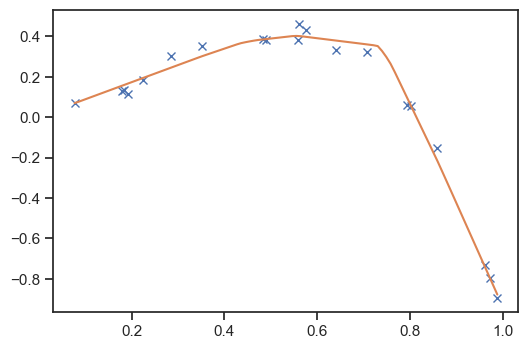

In [29]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x_fake, y_fake, 'x');
xx = torch.linspace(x_fake.min(), x_fake.max(), 100)[:, None]
yy = f(xx).detach().numpy()
ax.plot(xx, yy);

This fit does look a little bit better.
Let's now compare the training loss of stochastic gradient descent to the previous one:

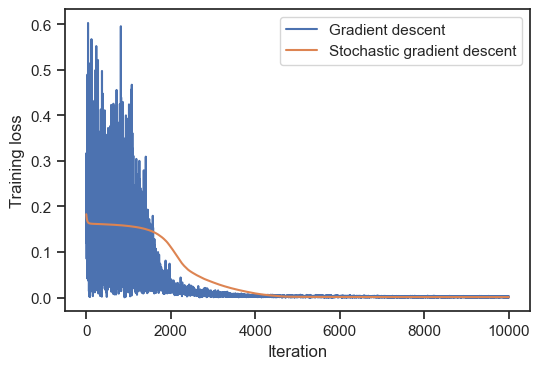

In [30]:
fig, ax = plt.subplots(dpi=100)
ax.plot(training_loss_sgd, label='Gradient descent')
ax.plot(training_loss, label='Stochastic gradient descent')
ax.set_xlabel('Iteration')
ax.set_ylabel('Training loss')
plt.legend(loc='best');

It is this wiggly nature of stochastic gradient descent that allows it to escape bad local minima.

### Questions

- Rerun the stochastic gradient descent with one sample per iteration ($m=1$). Does it converge? Do you need less or more iterations? Is it more or less wiggly?
- Rerun the stochastic gradient descent with 10 samples per iteration. How doe it perfom now?

## Example - Motorcyle Data

Let's now use the motorcycle data to do regression with DNNs.
This will help us demonstrate some best practices and specifically:
- Standarizing the data
- Splitting in training and test subsets

First, start by loading the dataset:

In [31]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/motor.dat"
download(url)

In [32]:
# Load the data
data = np.loadtxt('motor.dat')
x = data[:, 0][:, None]
y = data[:, 1][:, None]

In [33]:
# Split into training and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

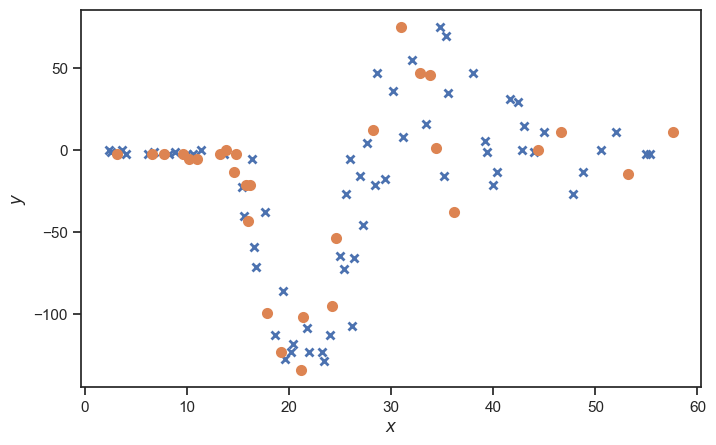

In [34]:
# Visualize them
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x_train, y_train, 'x', markeredgewidth=2, label='Training data')
ax.plot(x_test, y_test, 'o', markeredgewidth=2, label='Test data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [35]:
# Turn the data into torch tensors:
x_train = torch.tensor(x_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
x_test = torch.tensor(x_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

Please note that the specification of `dtype=torch.float` is absolutely needed here.
If you don't include it the code is not going to work.
The problem is that the `x_train` etc. are all numpy arrays and that numpy arrays have 64-bit floating point numbers by default.
PyTorch is using 32-bit floating point numbrs by default.
We need at some point make the two compatible.

Now we are ready to train the network.
Let's give it a shot.
We will use the same architecture as before.
The only difference is that I will be printing the validation loss instead of the training loss.

In [36]:
# The number of training samples
n = x_train.shape[0]

# Pick a subsampling batch size
m = 5

# Reinitialize the net:
f = nn.Sequential(nn.Linear(1, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 1))

# Reinitialize the optimizer
optimizer = torch.optim.SGD(f.parameters(), lr=0.01)
# Keep track of the training loss and the test loss
training_loss = []
test_loss = []
# Iterate the optimizer. Let's just do 10 iterations.
for i in range(10000):
    # Zero out the gradient buffers
    optimizer.zero_grad()
    # Sample m observation indices at random
    idx = np.random.randint(0, n, m)
    # Here is the subsample of the data
    x_batch = x_train[idx]
    y_batch = y_train[idx]
    # Make predictions
    y_pred = f(x_batch)
    # Evaluate the loss - That's what you are minimizing
    loss = mse_loss(y_batch, y_pred)
    training_loss.append(loss.item())
    # Evaluate the derivative of the loss with respect to
    # all parameters - It knows how to do it because of
    # PyTorch magick
    loss.backward()
    # And now you are ready to make a step
    optimizer.step()
    # Evaluate the test loss
    y_pred_test = f(x_test)
    ts_loss = mse_loss(y_test, y_pred_test)
    test_loss.append(ts_loss.item())
    # Print the loss every one hundend iterations:
    if i % 1000 == 0:
        print('it = {0:d}: loss = {1:1.2e}'.format(i, ts_loss.item()))

it = 0: loss = 4.05e+06
it = 1000: loss = nan
it = 2000: loss = nan
it = 3000: loss = nan
it = 4000: loss = nan
it = 5000: loss = nan
it = 6000: loss = nan
it = 7000: loss = nan
it = 8000: loss = nan
it = 9000: loss = nan


The above code may not work at all, giving you nan's.
Or it may work and get you nowhere.
The problem here is the scale of both the inputs and the outputs and the assumptions that have been made about them when we initialize the weights of the net and when we picked the learning rate of the optimization algorithm.
The easiest way to overcome this problem is to *standarize the data*.
This is achieved by subtracting the empirical mean and dividing by the empirical standard deviation both the inputs and the outputs.
By standarizing the data, we are making the default paramerameters (for weight initialization and stochastic gradient descent) valid again.
Standarization is such a common process that it is already implemented in [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
Here is how it works:

In [37]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler().fit(x)
target_scaler = StandardScaler().fit(y)

The `feature_scaler.transform()` is a function:
$$
x \rightarrow \frac{x-\mu}{\sigma},
$$
where $\mu$ and $\sigma$ are the empirical mean and standard deviation of the features.
Here they are:

In [38]:
# The mean:
feature_scaler.mean_

array([25.9])

In [39]:
# The standard deviation:
feature_scaler.scale_

array([13.88])

And here is how the scalers work:

In [40]:
x_scaled = feature_scaler.transform(x)
y_scaled = target_scaler.transform(y)

The data are now scaled, see this fig:

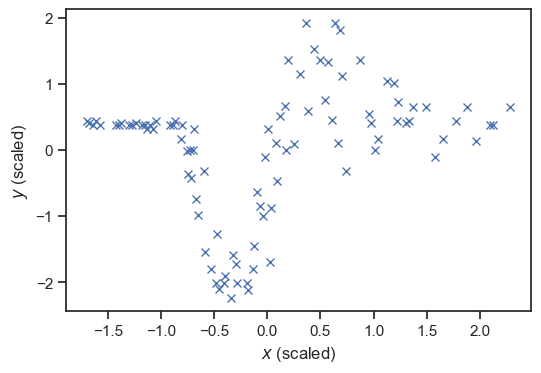

In [41]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x_scaled, y_scaled, 'x')
ax.set_xlabel('$x$ (scaled)')
ax.set_ylabel('$y$ (scaled)');

We will train the net using `x_scale` and `y_scaled`. We can always go back to the original scales at the end.
Let's see if it works.

In [42]:
# Split in training and test
x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(x_scaled, y_scaled,
                                                            test_size=0.3)

# Turn the data into torch tensors:
x_s_train = torch.tensor(x_s_train, dtype=torch.float)
y_s_train = torch.tensor(y_s_train, dtype=torch.float)
x_s_test = torch.tensor(x_s_test, dtype=torch.float)
y_s_test = torch.tensor(y_s_test, dtype=torch.float)

# The number of training samples
n = x_train.shape[0]

# Pick a subsampling batch size
m = 5

# Reinitialize the net:
f = nn.Sequential(nn.Linear(1, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 20),
                  nn.ReLU(),
                  nn.Linear(20, 1))

# Reinitialize the optimizer
optimizer = torch.optim.SGD(f.parameters(), lr=0.01)
# Keep track of the training loss and the test loss
training_loss = []
test_loss = []
# Iterate the optimizer. Let's just do 10 iterations.
for i in range(10000):
    # Zero out the gradient buffers
    optimizer.zero_grad()
    # Sample m observation indices at random
    idx = np.random.randint(0, n, m)
    # Here is the subsample of the data
    x_batch = x_s_train[idx]
    y_batch = y_s_train[idx]
    # Make predictions
    y_pred = f(x_batch)
    # Evaluate the loss - That's what you are minimizing
    loss = mse_loss(y_batch, y_pred)
    training_loss.append(loss.item())
    # Evaluate the derivative of the loss with respect to
    # all parameters - It knows how to do it because of
    # PyTorch magick
    loss.backward()
    # And now you are ready to make a step
    optimizer.step()
    # Evaluate the test loss
    y_pred_test = f(x_s_test)
    ts_loss = mse_loss(y_s_test, y_pred_test)
    test_loss.append(ts_loss.item())
    # Print the loss every one hundend iterations:
    if i % 1000 == 0:
        print('it = {0:d}: loss = {1:1.2e}'.format(i, ts_loss.item()))

it = 0: loss = 9.26e-01
it = 1000: loss = 3.26e-01
it = 2000: loss = 2.00e-01
it = 3000: loss = 1.99e-01
it = 4000: loss = 1.75e-01
it = 5000: loss = 1.62e-01
it = 6000: loss = 1.76e-01
it = 7000: loss = 1.84e-01
it = 8000: loss = 1.84e-01
it = 9000: loss = 2.30e-01


Let's visualize the fit:

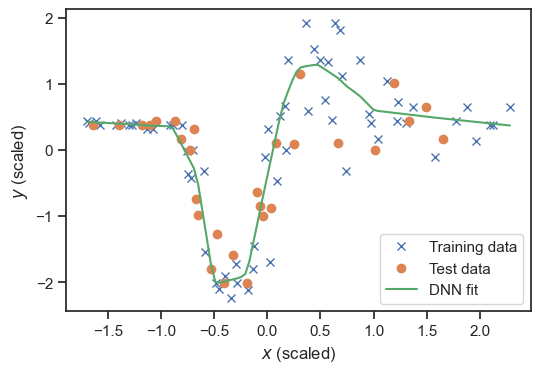

In [43]:
xx_scaled = torch.linspace(x_scaled.min(), x_scaled.max(), 100)[:, None]
yy_scaled = f(xx_scaled).detach().numpy()
fig, ax = plt.subplots(dpi=100)
ax.plot(x_s_train, y_s_train, 'x', label='Training data')
ax.plot(x_s_test, y_s_test, 'o', label='Test data')
ax.plot(xx_scaled, yy_scaled, label='DNN fit')
ax.set_xlabel('$x$ (scaled)')
ax.set_ylabel('$y$ (scaled)')
plt.legend(loc='best');

And here is predictions-observations plot on the test data set:

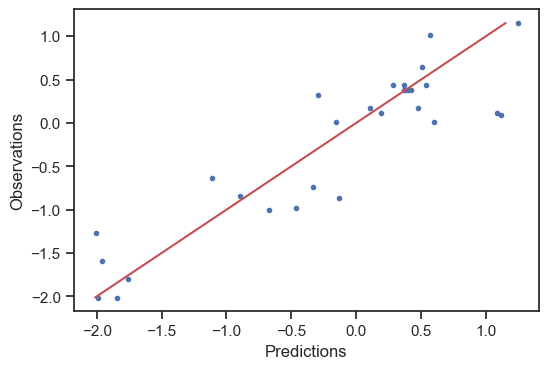

In [44]:
y_pred_test = f(x_s_test).detach().numpy()
fig, ax = plt.subplots(dpi=100)
ax.plot(y_pred_test, y_s_test, '.')
yys = np.linspace(y_s_test.min(), y_s_test.max(), 10)
ax.plot(yys, yys, 'r')
ax.set_xlabel('Predictions')
ax.set_ylabel('Observations');

Also, if you wish, you can scale the predictions back to the original units:

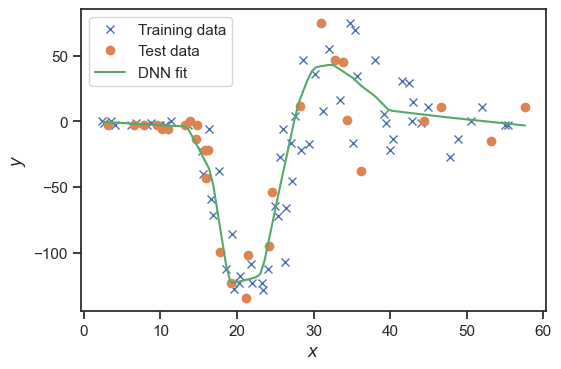

In [45]:
xx = feature_scaler.inverse_transform(xx_scaled)
yy = target_scaler.inverse_transform(yy_scaled)
fig, ax = plt.subplots(dpi=100)
ax.plot(x_train, y_train, 'x', label='Training data')
ax.plot(x_test, y_test, 'o', label='Test data')
ax.plot(xx, yy, label='DNN fit')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

It is instructive to observe how the training and test losses evolve as a function of the optimization iteration:

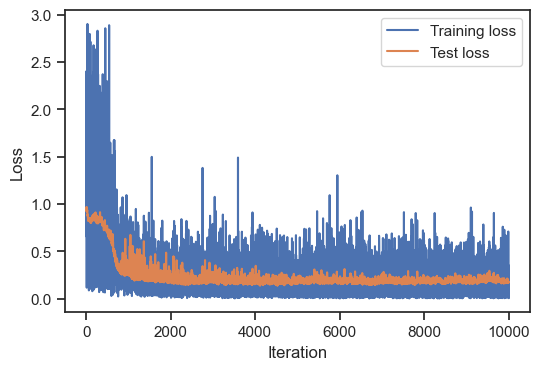

In [46]:
fig, ax = plt.subplots(dpi=100)
ax.plot(training_loss, label='Training loss')
ax.plot(test_loss, label='Test loss')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
plt.legend(loc='best');

The wiggliness is, of course, due to the stochastic nature of the optimization.
The training error converges to a minimum as you keep iterating.
This is direct consequence of the Robbins-Monro theorem. You will reach a local minimum of the training error eventually.
However, this is not the case for the test error.
The test error will reach a minimum at some point and then it will start going up!
It will always do this when you are training networks by just minimizing a loss function.
What happens is that the algorithm, by paying more attention to minimizing the training loss it will start, eventually, overfitting the training data and it will not be able to generalize correctly for the test data.
There are ways around this. We are going to learn about the basic one in the next lecture (*weight regularization* and *early stopping*).
There are some advanced ways to avoid overfitting (e.g., *dropout*, *Bayesian neural networks*) which we are not going to cover in the class.

### Questions

- Change the activation function from `nn.ReLU` to `nn.Tanh`. Are you getting a better fit or a worse fit?
- Rerun the code above for 100,000 iterations. Does it start to overfit the training data? What happens to the test loss?
- Rerun the code for 5,000 iterations. How does the prediction look like now? Early-stopping would stop at about this point.